In [16]:
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The data I have chosen to use related to my first capstone project. It was taken from a marketing campaign which was performed by a Portugese bank from 2008 to 2010. The outcome of the calls were recorded allong with some information related to the customer. 

In [23]:
bank = pd.read_csv('bank-full2.csv', delimiter=',')

Can you count something interesting?

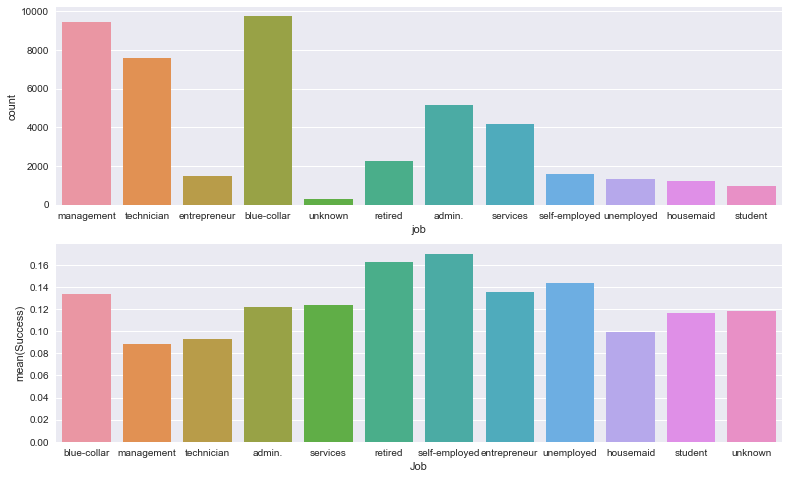

In [6]:
# Let's look at the job categories of the customers
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="job", data=bank)

# We then want to graph the which shows how successful the campaign was with each job category, to do this we first need to build a data frame which shows the proportion of success, grouped by job
jobsuccess = bank['job'].loc[bank['y']== 'yes'].value_counts()
jobcount = bank['job'].value_counts()
X = pd.DataFrame(columns=['Job','Success'])

Job=[]
Success=[]
for item in range(len(jobcount)):
    Job.append(jobcount.keys()[item])
    Success.append(jobsuccess[item]/jobcount[item])

Proportion = {'Job':Job, 'Success':Success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='Job', y='Success', data=X)

The above plots show the various categories of jobs which the bank's customers have. The plots show a number of interesting things. Firstly notice how the second most prevalent category of job is 'management', ordinarily this is not what one would expect. Is this a case of 'too many Chiefs and no Indians', or is it indicative of customers inflating their titles to maximse their chances of recieving loans and credit? It is difficult to deduce the cause from the dataset alone, however it is an interesting observation.

It is also interesting to look at the variations in the success rate between the groups. While it is hardly surprising to see retirees subscribing to term deposits some other categories are a little more surprising, such as the the success rate with blue-collar workers, students and the unemployed. This is contrasted with the low success rate among managers, who one would assume would have the financial means to hold a diverse investment portfolio, which may include term deposits. Once again it's difficult to deduce from the dataset why there is such a large disparity in success rate between the groups.

Can you find some trends (high, low, increase, decrease, anomalies)?

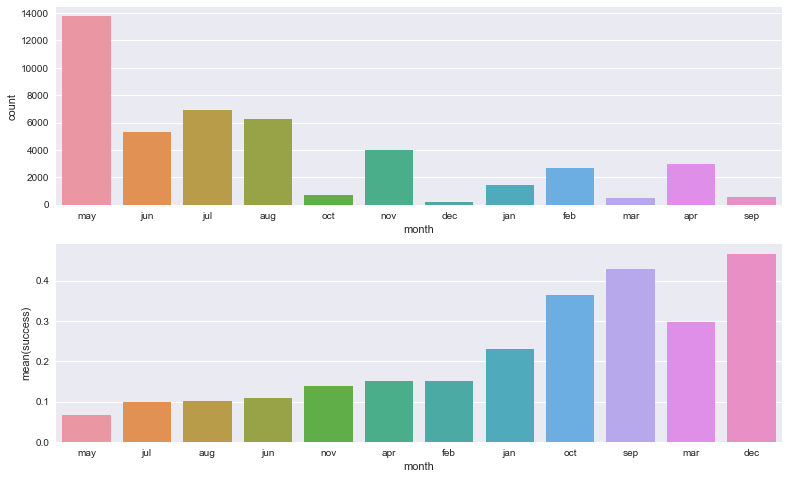

In [7]:
# Let's look at the success rate, categorised by month
# We first graph the Month and their respective totals
fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.countplot(x="month", data=bank)

# We then want to graph the which shows how successful the campaign was by month, to do this we first need to build a data frame which shows the proportion of success, grouped by month
monthsuccess = bank['month'].loc[bank['y']== 'yes'].value_counts()
monthcount = bank['month'].value_counts()
X = pd.DataFrame(columns=['month','Success'])

month=[]
success=[]
for item in range(len(monthcount)):
    month.append(monthcount.keys()[item])
    success.append(monthsuccess[item]/monthcount[item])

Proportion = {'month':month, 'success':success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='month', y='success', data=X)

It's interesting to see how dramatic the variation in success rate is between the months, especially when we consider that the dataset relates to a marketing campaign which took place over three years. It seems that most of the calls were made in May, however this is the month which had the lowest success rate, however on the months which had the least ammount of calls such December and March, the success rate was the highest.

As we will see in the modeling section of the capstone project, there is a statistical significance between the months, rather than the variation being due to random noise. It would have been extremly useful for the Bank to have investigated the disparity in success rate between the months. The best guess I can come up with is that the months relate to when the term deposits come to maturity, thus the high success rate is due to the bank contacting existing subscribers and asking them if they want to roll over the acocunt for another term.

Can you make a bar plot or a histogram?

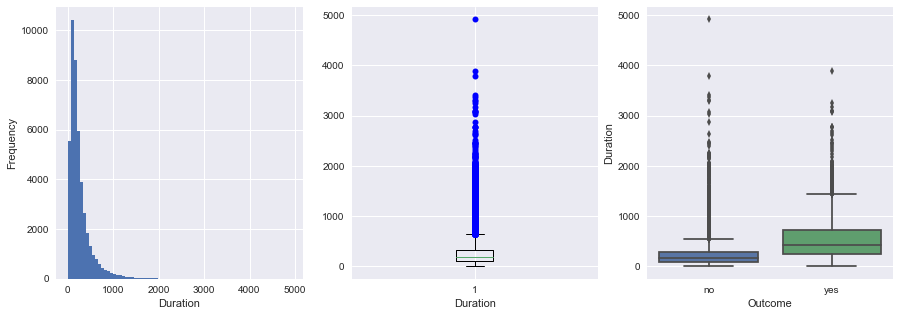

In [8]:
# Let's look at the duration of the final call
plt.subplot(1, 3, 1)
durationplt = bank.duration.plot( kind='hist', bins = 74, figsize=(15,5))
plt.xlabel('Duration')

plt.subplot(1, 3, 2)
durationbox = plt.boxplot(bank.duration, 0, 'b')
plt.xlabel('Duration')

plt.subplot(1, 3, 3)
durationbox2 = sns.boxplot(x="y", y="duration", data=bank)
durationbox2.set(xlabel='Outcome')
durationbox2.set(ylabel='Duration')

The above figures show the distribution of the durations of the final phone call. From the histogram on the left we can see that there is a strong inbalance in the duration, with most phone calls being fairly short. Since the overall success rate is 11.7%, we might guess that unsuccesful calls tend to be shorter than succesful ones.

If we look at the boxplot on the right, it confirms this guess. The successful calls tend to be much longer than the unsuccesful calls. This makes intuitive sense since customers who are interested in the will spend more time with the marketer, asking questions about the product. It will also take additional time for the customer to sign up for the product. This is in comparison to the uninterested customer, who is likely to be unwilling to spend time one the phone with the marketer. 

Can you compare two related quantities?

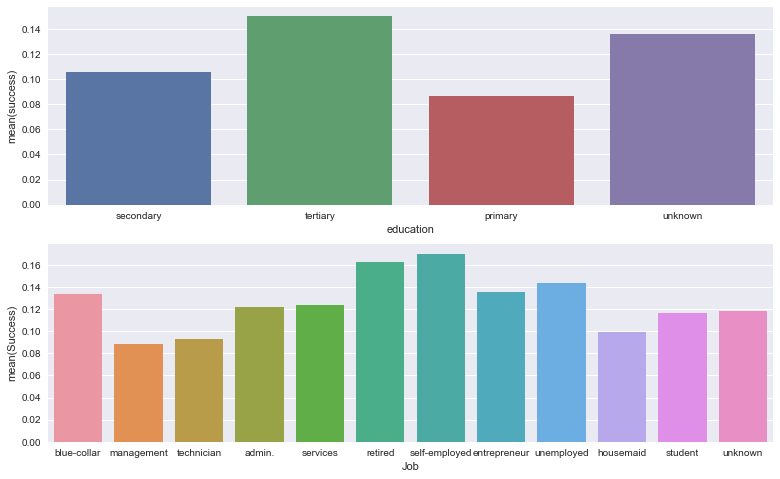

In [28]:
# Let's look at the success rate grouped by education level, and job category
# Plot the success rate, grouped by education level
educationsuccess = bank['education'].loc[bank['y']== 'yes'].value_counts()
educationcount = bank['education'].value_counts()
X = pd.DataFrame(columns=['education','Success'])

education=[]
success=[]
for item in range(len(educationcount)):
    education.append(educationcount.keys()[item])
    success.append(educationsuccess[item]/educationcount[item])

Proportion = {'education':education, 'success':success}
X = pd.DataFrame(Proportion)

fig, axes = plt.subplots(figsize=(13, 8))
plt.subplot(2, 1, 1)
sns.barplot(x='education', y='success', data=X)

# Plot the success rate, grouped by job category
jobsuccess = bank['job'].loc[bank['y']== 'yes'].value_counts()
jobcount = bank['job'].value_counts()
X = pd.DataFrame(columns=['Job','Success'])

Job=[]
Success=[]
for item in range(len(jobcount)):
    Job.append(jobcount.keys()[item])
    Success.append(jobsuccess[item]/jobcount[item])

Proportion = {'Job':Job, 'Success':Success}
X = pd.DataFrame(Proportion)

plt.subplot(2, 1, 2)
sns.barplot(x='Job', y='Success', data=X)

Let's look at the differences in success rates between the job category, and the education level. There appears to be an apparent paradox here, for the education level it would seem that having a higher education would correlate with in increase in your probability of subscribing. However when we look at the job categories, jobs categories such as blue-collar and unemployed have higher probabilities of success compared to management and technicians. 

One potential problem with the job categories is their subjective nature. What is the defenition of management? Is a supervisor at a fast food chain considered management, or is the clasification reserved for corporate executives? As we discussed earlier, there seems to be an unnaturally high prevelence of managers in our data set. This problem is likely less relevant for the education level, as there is much less subjectivity, the customer either has completed high school or they haven't, similary the customer either has a tertiarry qualification or they don't

Can you make a scatterplot?

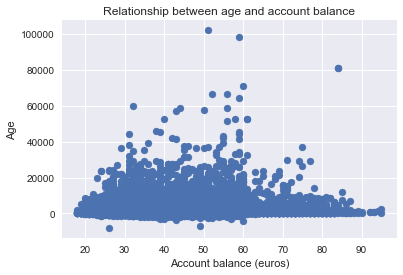

In [15]:
# Let's make a scatter plot which show's the relationship between age and account balance
plt.scatter(bank.age, bank.balance)
plt.xlabel("Age")
plt.ylabel("Account balance (euros)")
plt.title("Relationship between age and account balance")

Intuitively one might expect that older people would have larger bank account balances, however the scatter plot does not seem to support this notion. Rather we see a far more interesting trend, wealth disparity seems to increase between 18 and 55, and then begins to decline after that.

Personally I am surprised by the lack of extreme wealth at the older end of the age spectrum, as I would have expected that for skilled investors, their wealth would gradually increase over their lifetime.

One point to bear in mind when analysing the scatter plot is that the account balance does not represent the wealth of the person. Most of the other people will not have their entire networth in their savings account, they will likely have a portion of in securities and realestate

Can you make a time-series plot?

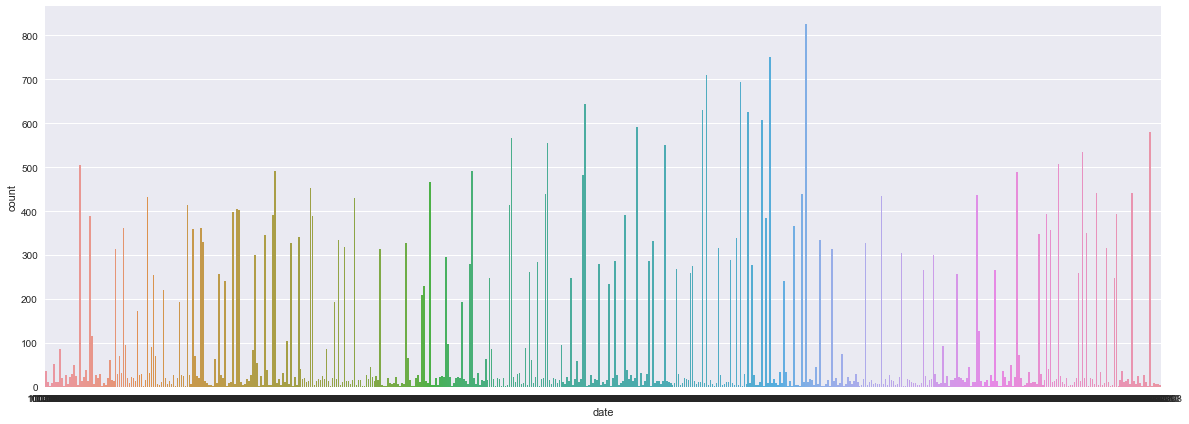

In [81]:
# We will now create a new feature called date, we do this by combining the date, month and year columns, the format I will use is DDMMYYYY
lb_make = LabelEncoder()
bank['month'+"_code"] = lb_make.fit_transform(bank['month'])
bank['date'] = (bank['day']*1000000)+(bank['month_code']*10000)+bank['year']

fig, axes = plt.subplots(figsize=(20, 7))
ax = sns.countplot(x="date", data=bank)

The above show's the total ammount of calls made per dat over the 3 year marketing campaign. We can see that on average few calls were made per dat, however on a particularly busy day over 800 calls were made! 

Having made these plots, what are some insights you get from them? Do you see any correlations? Is there a hypothesis you would like to investigate further? What other questions do they lead you to ask?

The first thing which jumps out at me when I look at these figures is how big the disparity is between the success rate between different months, there are some months where the success rate is over five times larger. However the thing which I don't like about the data set is that there is no year variable. It seems obvious that December 2008 is not equivalent to 2010, however this dataset seems to imply that they are homogenous.

I would presume that between the different years there is a number of social and economic factors which are changing, thus causing variations in the success rate. It would be extremly interesting to develop this idea further and use it as a feature of our predictive model, since this is something which as yet has not been done on this dataset.

By now you’ve asked a bunch of questions, and found some neat insights. Is there an interesting narrative, a way of presenting the insights using text and plots from the above, that tells a compelling story? As you work out this story, what are some other trends/relationships you think will make it more complete?

Although the relationship between a customers characteristics and their purchasing behaviour is extremly complex, it is interesting to see how accuratly we can predict consumer behaviour. Is the data which we have in this data set enough to accuratly model the probability that a given customer will subscribe to a term deposit. 

I would be inclined to think that we can produce models which accuratly predict customer behaviour. The reason for this is that the data which we have is much more than just random noise. We can clearly see trends in the data, differences in rates of success between various categories vs the whole sample. Since these trends exist we can infer that is will be possible to build statistical models which are capable of predicting customer behaviour.